<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:َ  Ali Yousefi

**Student ID**:  99109111



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [ ]:
# Load the Boston dataset from the provided CSV file
boston_data = pd.read_csv('boston.csv')

# Display the features of the dataset
print("Features of the Boston dataset:")
print(boston_data.columns)

# Display the shape of the dataset
print("\nShape of the Boston dataset:")
print(boston_data.shape)

boston_data.head()

Features of the Boston dataset:
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Shape of the Boston dataset:
(506, 14)


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [ ]:

# Split the dataset into X (features) and y (target)
#The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict
# the value of a house.
X = boston_data.drop(columns=['MEDV'])
y = boston_data['MEDV']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared and RMSE for the training set
r2_train = r2_score(y_train, y_train_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

# Calculate R-squared and RMSE for the test set
r2_test = r2_score(y_test, y_test_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

# Get the coefficients of the model
coefficients = model.coef_
print("Train R-squared:", r2_train)
print("Train RMSE:", rmse_train)
print("Test R-squared:", r2_test)
print("Test RMSE:", rmse_test)
print("Coefficients:", coefficients)
print("Test MSE:", rmse_test**2)

Train R-squared: 0.7508856358979673
Train RMSE: 4.6520331848801675
Test R-squared: 0.6687594935356315
Test RMSE: 4.92860218266534
Coefficients: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Test MSE: 24.291119474973556


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [ ]:
#set alphas
alphas = 10 ** np.linspace(3, -3, 100)*0.5
ridge=Ridge()
parameters={'alpha':alphas.tolist()}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=2)

# fitting model
ridge_regressor.fit(X_train,y_train)

# printing results
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.0005}
-22.92789349237396


 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

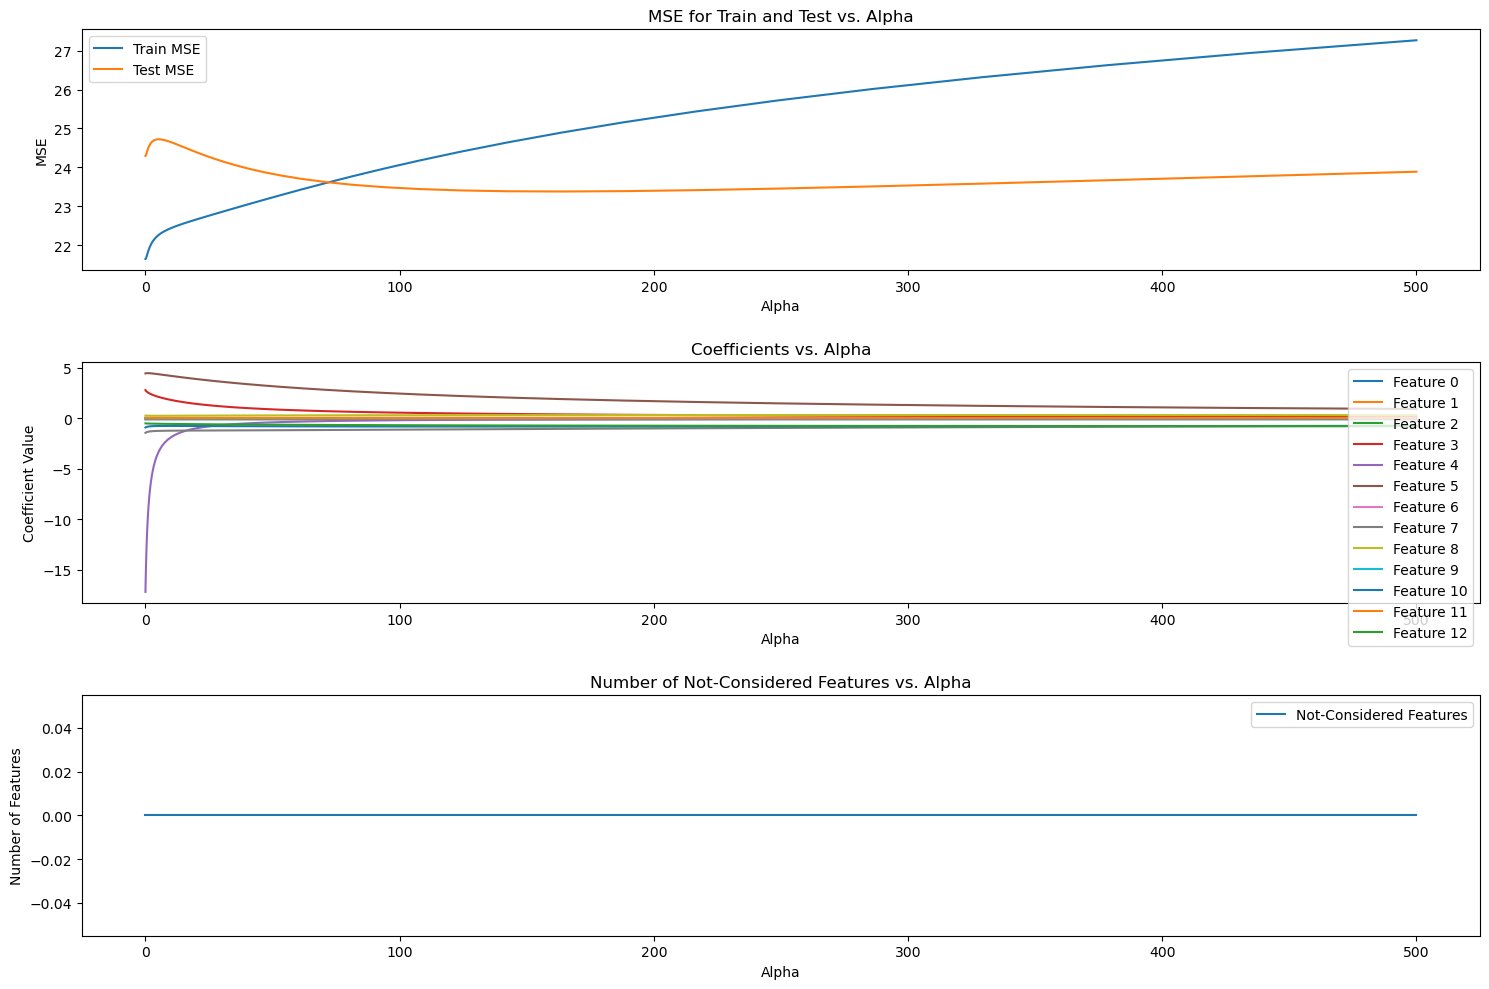

Optimal Alpha: 163.72745814388642
MSE for Optimal Alpha: 23.378168171507387
R^2 for Optimal Alpha: 0.6812087531281752
Coefficients for Optimal Alpha: [-0.11058924  0.03996102 -0.0520014   0.38073404 -0.115418    1.89720331
  0.00709776 -1.05241569  0.3094509  -0.01494741 -0.82272188  0.01159841
 -0.72589539]


In [ ]:
train_mse = []
test_mse = []
coefficients = []
not_considered_features = []

#set alphas
alphas = 10 ** np.linspace(3, -3, 100)*0.5

# Iterate over different alpha values
for alpha in alphas:
    # Fit Ridge Regression model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    # Predict on training and testing sets
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)

    # Calculate MSE for training and testing sets
    train_mse.append(root_mean_squared_error(y_train, y_train_pred)**2)
    test_mse.append(root_mean_squared_error(y_test, y_test_pred)**2)

    # Store coefficients
    coefficients.append(ridge.coef_)

    # Count number of not-considered features (features with coefficient equal to zero)
    not_considered_features.append(np.sum(ridge.coef_ == 0))

# Plotting the results
plt.figure(figsize=(15, 10))

# Plot MSE for train and test versus α
plt.subplot(3, 1, 1)
plt.plot(alphas, train_mse, label='Train MSE')
plt.plot(alphas, test_mse, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test vs. Alpha')
plt.legend()

# Plot Coefficients versus α
plt.subplot(3, 1, 2)
coefficients = np.array(coefficients)
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=f'Feature {i}')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Alpha')
plt.legend()

# Plot Number of Not-Considered Features versus α
plt.subplot(3, 1, 3)
plt.plot(alphas, not_considered_features, label='Not-Considered Features')
plt.xlabel('Alpha')
plt.ylabel('Number of Features')
plt.title('Number of Not-Considered Features vs. Alpha')
plt.legend()

plt.tight_layout()
plt.show()

# Select the optimal value of α based on the minimum test MSE
optimal_alpha = alphas[np.argmin(test_mse)]

# Report MSE, R^2, and coefficients for the optimal alpha
ridge_optimal = Ridge(alpha=optimal_alpha)
ridge_optimal.fit(X_train, y_train)
y_test_pred_optimal = ridge_optimal.predict(X_test)
mse_optimal = root_mean_squared_error(y_test, y_test_pred_optimal)**2
r2_optimal = r2_score(y_test, y_test_pred_optimal)
coefficients_optimal = ridge_optimal.coef_

print(f'Optimal Alpha: {optimal_alpha}')
print(f'MSE for Optimal Alpha: {mse_optimal}')
print(f'R^2 for Optimal Alpha: {r2_optimal}')
print(f'Coefficients for Optimal Alpha: {coefficients_optimal}')



**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

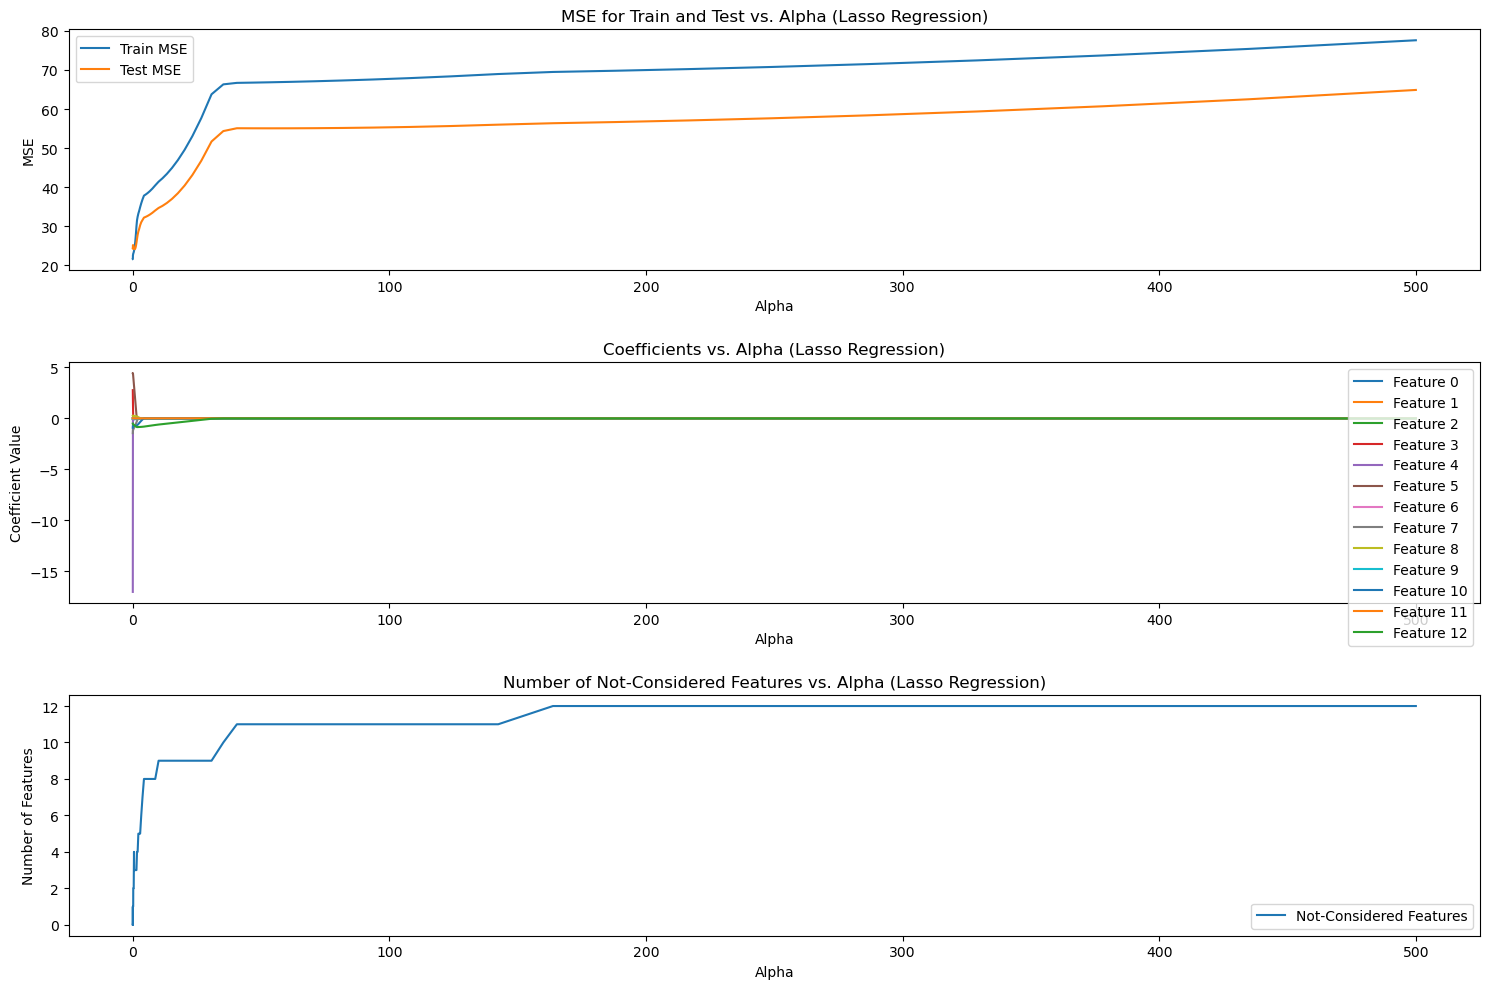

Optimal Alpha: 0.7087370814634024
MSE for Optimal Alpha: 24.153219243073362
R^2 for Optimal Alpha: 0.6706399397086964
Coefficients for Optimal Alpha: [-0.08616746  0.0308067  -0.          0.         -0.          2.50824373
  0.00611413 -0.801558    0.22931102 -0.01270717 -0.72057187  0.01186642
 -0.68953564]


In [ ]:
alphas = 10 ** np.linspace(3, -3, 100)*0.5
train_mse = []
test_mse = []
coefficients = []
not_considered_features = []

# Iterate over different alpha values
for alpha in alphas:
    # Fit Lasso Regression model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    # Predict on training and testing sets
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)

    # Calculate MSE for training and testing sets
    train_mse.append(root_mean_squared_error(y_train, y_train_pred)**2)
    test_mse.append(root_mean_squared_error(y_test, y_test_pred)**2)

    # Store coefficients
    coefficients.append(lasso.coef_)

    # Count number of not-considered features (features with coefficient equal to zero)
    not_considered_features.append(np.sum(lasso.coef_ == 0))

# Plotting the results
plt.figure(figsize=(15, 10))

# Plot MSE for train and test versus α
plt.subplot(3, 1, 1)
plt.plot(alphas, train_mse, label='Train MSE')
plt.plot(alphas, test_mse, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test vs. Alpha (Lasso Regression)')
plt.legend()

# Plot Coefficients versus α
plt.subplot(3, 1, 2)
coefficients = np.array(coefficients)
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=f'Feature {i}')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Alpha (Lasso Regression)')
plt.legend()

# Plot Number of Not-Considered Features versus α
plt.subplot(3, 1, 3)
plt.plot(alphas, not_considered_features, label='Not-Considered Features')
plt.xlabel('Alpha')
plt.ylabel('Number of Features')
plt.title('Number of Not-Considered Features vs. Alpha (Lasso Regression)')
plt.legend()

plt.tight_layout()
plt.show()

# Select the optimal value of α based on the minimum test MSE
optimal_alpha = alphas[np.argmin(test_mse)]

# Report MSE, R^2, and coefficients for the optimal alpha
lasso_optimal = Lasso(alpha=optimal_alpha)
lasso_optimal.fit(X_train, y_train)
y_test_pred_optimal = lasso_optimal.predict(X_test)
mse_optimal = root_mean_squared_error(y_test, y_test_pred_optimal)**2
r2_optimal = r2_score(y_test, y_test_pred_optimal)
coefficients_optimal = lasso_optimal.coef_

print(f'Optimal Alpha: {optimal_alpha}')
print(f'MSE for Optimal Alpha: {mse_optimal}')
print(f'R^2 for Optimal Alpha: {r2_optimal}')
print(f'Coefficients for Optimal Alpha: {coefficients_optimal}')

* linear regresion **MSE** and **R^2** in this case is better than lasso

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

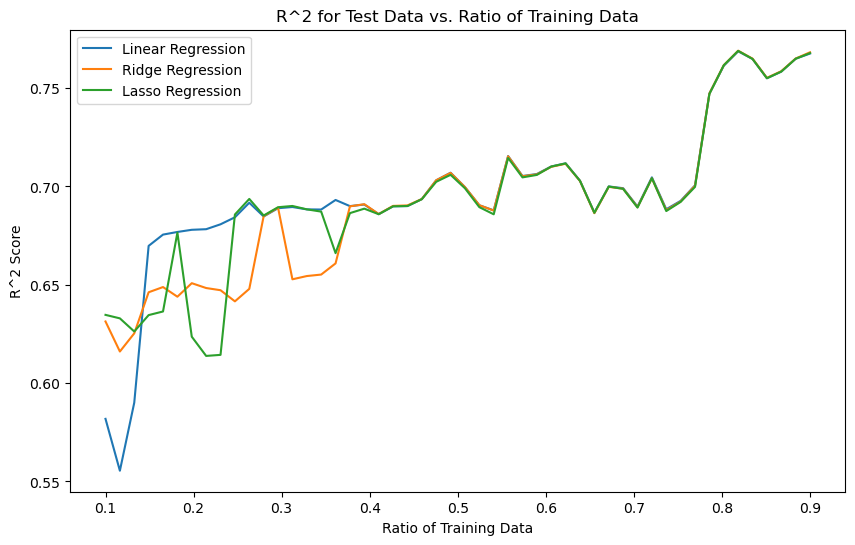

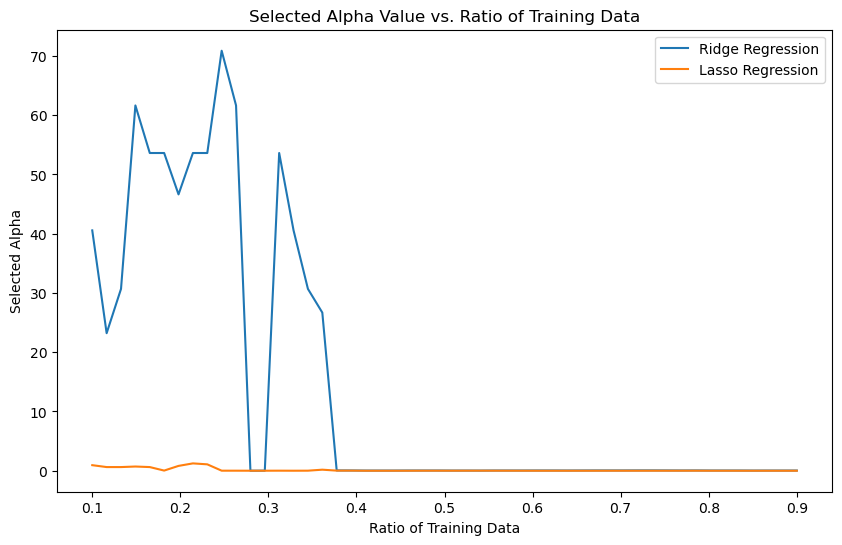

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

ratios = np.linspace(0.1, 0.9, 50)

# Initialize lists to store the results
r2_scores = {'Linear Regression': [], 'Ridge Regression': [], 'Lasso Regression': []}
alpha_values = {'Ridge Regression': [], 'Lasso Regression': []}

# Iterate through the ratios
for ratio in ratios:
    # Split the data based on the current ratio
    X_train_current, X_test, y_train_current, y_test = train_test_split(X, y, test_size=1-ratio, random_state=43)
    # Fit the linear regression model
    linear_reg = LinearRegression()
    linear_reg.fit(X_train_current, y_train_current)
    y_pred = linear_reg.predict(X_test)
    r2_scores['Linear Regression'].append(linear_reg.score(X_test, y_test))

    # Fit the ridge regression model
    ridge_reg = RidgeCV(alphas=alphas)
    ridge_reg.fit(X_train_current, y_train_current)
    y_pred = ridge_reg.predict(X_test)
    r2_scores['Ridge Regression'].append(ridge_reg.score(X_test, y_test))
    alpha_values['Ridge Regression'].append(ridge_reg.alpha_)

    # Fit the lasso regression model
    lasso_reg = LassoCV(alphas=alphas)
    lasso_reg.fit(X_train_current, y_train_current)
    y_pred = lasso_reg.predict(X_test)
    r2_scores['Lasso Regression'].append(lasso_reg.score(X_test, y_test))
    alpha_values['Lasso Regression'].append(lasso_reg.alpha_)

# Plot the R^2 scores
plt.figure(figsize=(10, 6))
plt.plot(ratios, r2_scores['Linear Regression'], label='Linear Regression')
plt.plot(ratios, r2_scores['Ridge Regression'], label='Ridge Regression')
plt.plot(ratios, r2_scores['Lasso Regression'], label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('R^2 Score')
plt.title('R^2 for Test Data vs. Ratio of Training Data')
plt.legend()
plt.show()

# Plot the selected alpha values
plt.figure(figsize=(10, 6))
plt.plot(ratios, alpha_values['Ridge Regression'], label='Ridge Regression')
plt.plot(ratios, alpha_values['Lasso Regression'], label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected Alpha')
plt.title('Selected Alpha Value vs. Ratio of Training Data')
plt.legend()
plt.show()

$R^2$ for test data versus ratio of training data:

* As the ratio of training data increases, the $R^2$ for the test data  increase for all three methods (linear regression, ridge regression, and lasso regression).

* For low ratios of training data, linear regression is likely to overfit the training data, resulting in a lower $R^2$ for the test data compared to ridge and lasso regression.

* Ridge and lasso regression are expected to perform better than linear regression in preventing overfitting, especially at lower ratios of training data. Their $R^2$ for the test data should be higher than linear regression.

* As the ratio of training data increases, the differences in $R^2$ between the three methods  decrease, as all models become better able to generalize to the test data.

Selected α value versus training data ratio for ridge and lasso regression:

* The selected α value (the regularization parameter) is expected to decrease as the ratio of training data increases for both ridge and lasso regression.

* At lower ratios of training data, a higher α value is likely to be selected to impose stronger regularization and prevent overfitting.

* As the ratio of training data increases, the need for strong regularization decreases, and the selected α value should decrease accordingly.

* The behavior of the α value may differ between ridge and lasso regression. Lasso regression tends to select sparser models by setting some coefficients to exactly zero, while ridge regression shrinks all coefficients towards zero without setting any to exactly zero.
